In [1]:
csv_path = '/content/telecomx_treated.csv'

In [4]:
import pandas as pd
df = pd.read_csv(csv_path)
df.head()

,customerID,Churn,Genero,AdultoMayor,customer.Partner,customer.Dependents,MesesContrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,MetodoPago,CargoMensual,account.Charges.Total,Churn_flag,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,ChequeFísico,65.6,593.3,False,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,ChequeFísico,59.9,542.4,False,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,ChequeElectronico,73.9,280.85,True,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,ChequeElectronico,98.0,1237.85,True,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,ChequeFísico,83.9,267.4,True,2.80


In [7]:
# Convertir la columna 'account.Charges.Total' a numérica
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [9]:
cols_to_drop = ['customerID',       # identificador único
                'Churn',            # versión duplicada de la variable objetivo
                'Cuentas_Diarias',  # derivada de CargoMensual
                'account.Charges.Total']  # altamente correlacionada

df_reduced = df.drop(columns=cols_to_drop)

In [11]:
# Visualizar las primeras filas del dataset reducido
df_reduced.head()

,Genero,AdultoMayor,customer.Partner,customer.Dependents,MesesContrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,MetodoPago,CargoMensual,Churn_flag
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,ChequeFísico,65.6,False
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,ChequeFísico,59.9,False
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,ChequeElectronico,73.9,True
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,ChequeElectronico,98.0,True
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,ChequeFísico,83.9,True


Este código conserva Churn_flag como variable objetivo (booleana) y todas las demás variables categóricas y numéricas relevantes para los modelos predictivos.

In [12]:
# Separar la variable objetivo
y = df_reduced['Churn_flag'].astype(int)  # convertir a entero 0/1
X = df_reduced.drop(columns=['Churn_flag'])

In [13]:
# Identificar columnas categóricas (tipo object)
categorical_cols = X.select_dtypes(include=['object']).columns

In [14]:
# Aplicar one-hot encoding
# drop_first=True elimina la primera categoría de cada variable para evitar colinealidad perfecta (opcional)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [15]:
# Verificar tamaño y algunas columnas codificadas
print(f"Dimensiones después de codificar: {X_encoded.shape}")
X_encoded.head()

Dimensiones después de codificar: (7267, 29)


,AdultoMayor,MesesContrato,CargoMensual,Genero_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,MetodoPago_ChequeFísico,MetodoPago_TarjetaCredito,MetodoPago_Transferencia
0,0,9,65.6,False,True,True,True,False,False,False,...,False,True,False,False,True,False,True,True,False,False
1,0,9,59.9,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0,4,73.9,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,13,98.0,True,True,False,True,False,False,True,...,False,True,False,True,False,False,True,False,False,False
4,1,3,83.9,False,True,False,True,False,False,True,...,False,True,False,False,False,False,True,True,False,False


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Convertir la variable a numérica si no lo está
df_reduced['Churn_flag'] = df_reduced['Churn_flag'].astype(int)


In [46]:
# Identificar columnas numéricas (excluyendo las categóricas)
numeric_cols = df_reduced.select_dtypes(exclude=['object']).columns.tolist()


In [47]:
# Calcular la matriz de correlación
corr_matrix = df_reduced[numeric_cols].corr()

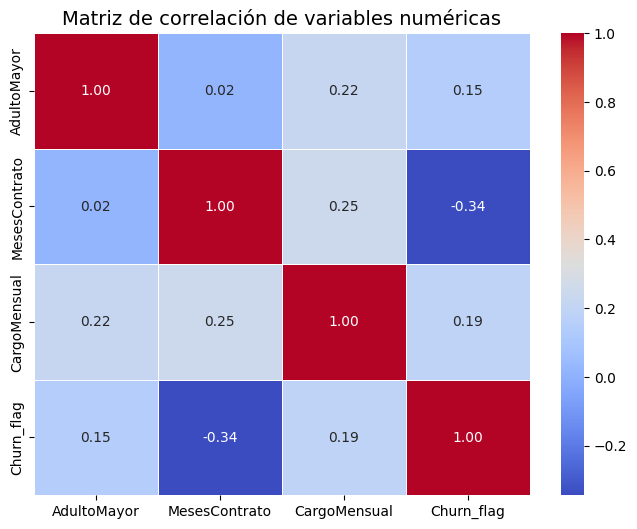

In [48]:
# Visualizar la matriz de correlación completa
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación de variables numéricas", fontsize=14)
plt.show()

In [49]:
# Además, puedes enfocarte en la correlación con la cancelación
corr_with_target = corr_matrix['Churn_flag'].drop('Churn_flag').sort_values(ascending=False)
print("Correlación con la variable Churn_flag:")
print(corr_with_target)

Correlación con la variable Churn_flag:
CargoMensual     0.189866
AdultoMayor      0.146733
MesesContrato   -0.344079
Name: Churn_flag, dtype: float64


/tmp/ipython-input-2264604275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MesesContrato', data=df, palette='Set3')


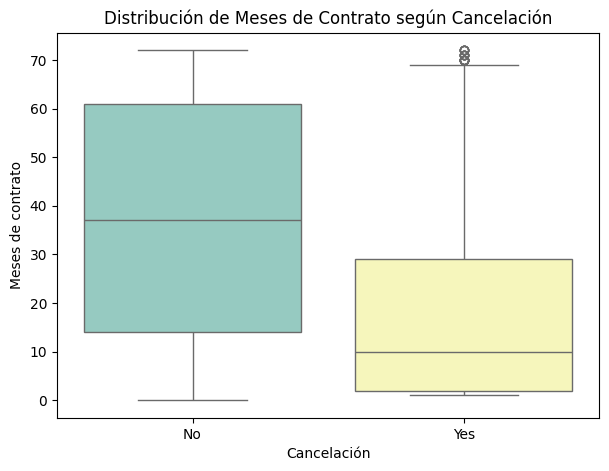

In [50]:
# 1. Tiempo de contrato × Cancelación
plt.figure(figsize=(7, 5))
sns.boxplot(x='Churn', y='MesesContrato', data=df, palette='Set3')
plt.title('Distribución de Meses de Contrato según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Meses de contrato')
plt.show()


/tmp/ipython-input-4149759172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MesesContrato', data=df, palette='Set2', inner='quartile')


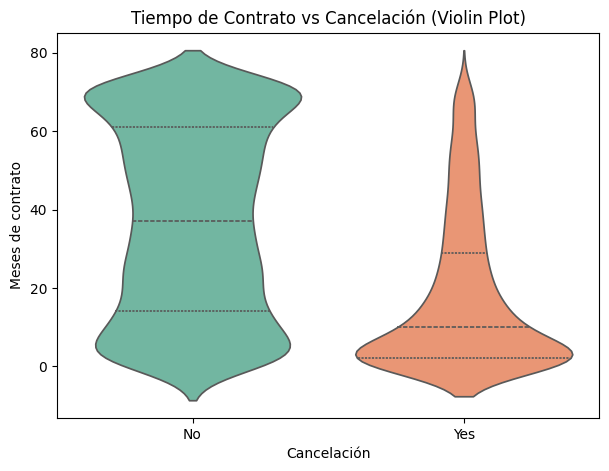

In [51]:
# También puedes visualizarlo con un violinplot para ver densidades
plt.figure(figsize=(7, 5))
sns.violinplot(x='Churn', y='MesesContrato', data=df, palette='Set2', inner='quartile')
plt.title('Tiempo de Contrato vs Cancelación (Violin Plot)')
plt.xlabel('Cancelación')
plt.ylabel('Meses de contrato')
plt.show()



/tmp/ipython-input-2005866509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette='Set3')


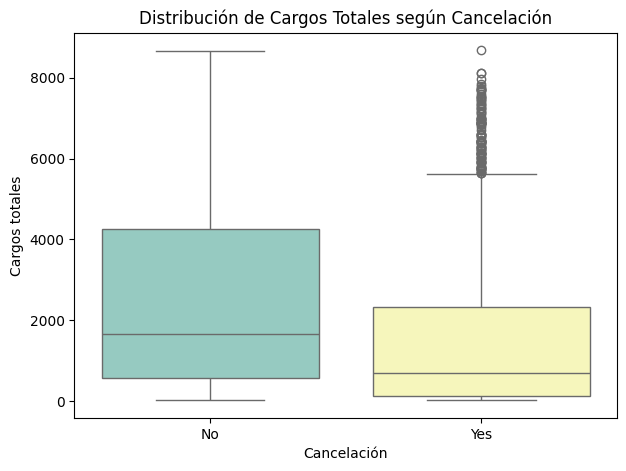

In [52]:
# 2. Gasto total (cargos totales) × Cancelación
plt.figure(figsize=(7, 5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette='Set3')
plt.title('Distribución de Cargos Totales según Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Cargos totales')
plt.show()


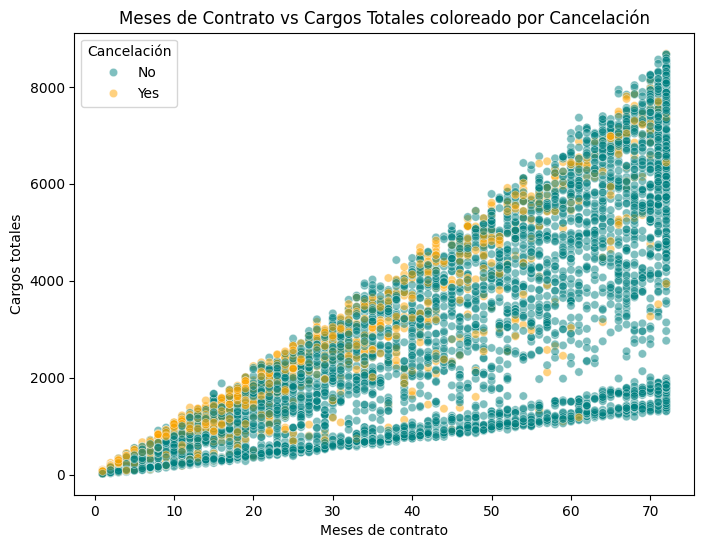

In [53]:
# Otra opción: scatter plot MesesContrato vs account.Charges.Total con color por Churn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='MesesContrato', y='account.Charges.Total',
    hue='Churn', alpha=0.5, palette={'No': 'teal', 'Yes': 'orange'}
)
plt.title('Meses de Contrato vs Cargos Totales coloreado por Cancelación')
plt.xlabel('Meses de contrato')
plt.ylabel('Cargos totales')
plt.legend(title='Cancelación')
plt.show()

Meses de contrato × Cancelación: en los boxplots/violins verás que los clientes que cancelan tienden a tener contratos de duración menor (valores más bajos y mediana inferior) respecto a los que permanecen. Esto confirma la correlación negativa observada anteriormente.
	•	Cargos totales × Cancelación: al graficar los cargos totales por clase, se aprecia que los clientes que cancelan tienen, en general, gastos acumulados menores que quienes permanecen. Esto es lógico, ya que han estado menos tiempo en la empresa.
	•	Scatter plot: permite ver la relación simultánea entre MesesContrato y account.Charges.Total para ambos grupos. Los clientes sin cancelación se concentran en la región de meses y cargos más altos, mientras que los que sí cancelan se distribuyen en valores más bajos.
  

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [17]:
# Columnas numéricas (excluyendo la target)
numeric_cols = X.select_dtypes(exclude=['object']).columns

In [18]:
# Definir transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

In [19]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Ajustar y transformar
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [21]:
# Aseguramos que sea numérica para claridad
df_reduced['Churn_flag'] = df_reduced['Churn_flag'].astype(int)

In [22]:
# Conteo absoluto de cada clase
churn_counts = df_reduced['Churn_flag'].value_counts().rename({0: 'Permanecen', 1: 'Cancelan'})
print("Conteo absoluto:")
print(churn_counts)

Conteo absoluto:
Churn_flag
Permanecen    5398
Cancelan      1869
Name: count, dtype: int64


In [23]:
# Porcentajes (proporción) de cada clase
churn_percentage = df_reduced['Churn_flag'].value_counts(normalize=True).mul(100).rename({0: 'Permanecen', 1: 'Cancelan'})
print("\nProporción (%):")
print(churn_percentage.round(2))


Proporción (%):
Churn_flag
Permanecen    74.28
Cancelan      25.72
Name: proportion, dtype: float64


In [25]:
# visualización en forma de DataFrame:
churn_summary = pd.DataFrame({
    'conteo': churn_counts,
    'porcentaje': churn_percentage.round(2)
})
print("\nResumen de cancelación:")
print(churn_summary)


Resumen de cancelación:
            conteo  porcentaje
Churn_flag                    
Permanecen    5398       74.28
Cancelan      1869       25.72


aproximadamente 26 % de los clientes han cancelado y 74 % permanecen, lo que indica una clase minoritaria significativa (desbalance moderado) que conviene tener en cuenta al elegir algoritmos o técnicas como ajuste de pesos, sobremuestreo (SMOTE) o submuestreo.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [27]:
# Separar X e y
y = df_reduced['Churn_flag'].astype(int)
X = df_reduced.drop(columns=['Churn_flag'])

In [28]:
# Inspeccionar la escala de las variables numéricas
print("Descripción de variables numéricas:")
print(X.select_dtypes(exclude=['object']).describe())


Descripción de variables numéricas:
       AdultoMayor  MesesContrato  CargoMensual
count  7267.000000    7267.000000   7267.000000
mean      0.162653      32.346498     64.720098
std       0.369074      24.571773     30.129572
min       0.000000       0.000000     18.250000
25%       0.000000       9.000000     35.425000
50%       0.000000      29.000000     70.300000
75%       0.000000      55.000000     89.875000
max       1.000000      72.000000    118.750000


In [29]:
# Identificar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [30]:
# Preprocesador con normalización para modelos sensibles a la escala
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols) # Removed handle_unknown='ignore'
    ])

In [31]:
# Preprocesador sin normalización para modelos basados en árboles
preprocessor_no_scale = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])


In [32]:
# Ejemplo de uso con un modelo que requiere normalización (regresión logística)
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [33]:
# Ejemplo con KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [34]:
# Ejemplo con SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', SVC(kernel='rbf', probability=True))
])


In [35]:
# Ejemplo con un modelo basado en árboles (no requiere normalizar)
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scale),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_no_scale),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])


In [36]:
# División de los datos para entrenamiento y prueba (stratify para mantener proporción de Churn)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
# Ajuste y evaluación rápida (como ejemplo) para los modelos que requieren normalización
logistic_pipeline.fit(X_train, y_train)
print("Exactitud Regresión Logística:", logistic_pipeline.score(X_test, y_test))

knn_pipeline.fit(X_train, y_train)
print("Exactitud KNN:", knn_pipeline.score(X_test, y_test))

Exactitud Regresión Logística: 0.8005502063273727
Exactitud KNN: 0.749656121045392


In [38]:
# Para modelos de árbol, se usa el preprocesador sin normalización
tree_pipeline.fit(X_train, y_train)
print("Exactitud Árbol de Decisión:", tree_pipeline.score(X_test, y_test))

rf_pipeline.fit(X_train, y_train)
print("Exactitud Random Forest:", rf_pipeline.score(X_test, y_test))

Exactitud Árbol de Decisión: 0.7324621733149931
Exactitud Random Forest: 0.7730398899587345


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Definir X e y
X = df_reduced.drop(columns=['Churn_flag'])
y = df_reduced['Churn_flag'].astype(int)  # convertir a entero

In [43]:
# División 80/20 (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,         # 0.30 para 70/30
    random_state=42,        # fija la semilla para reproducibilidad
    stratify=y              # mantiene la proporción de clases
)

print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)


Tamaño conjunto de entrenamiento: (5813, 18)
Tamaño conjunto de prueba: (1454, 18)


Preparar el entorno y los datos

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [55]:
# Definir variable objetivo y características
X = df_reduced.drop(columns=['Churn_flag'])
y = df_reduced['Churn_flag'].astype(int)

In [56]:
# Dividir en entrenamiento (80%) y prueba (20%), estratificado por la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [57]:
# Identificar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

 Modelo con normalización: Regresión Logística

In [58]:
# Preprocesador con escalado para variables numéricas y one-hot encoding para categóricas
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)


In [59]:

# Construir el pipeline con la Regresión Logística
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [60]:
# Entrenar el modelo
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AdultoMayor',
                                                   'MesesContrato',
                                                   'CargoMensual']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genero', 'customer.Partner',
                                                   'customer.Dependents',
                                                   'phone.PhoneService',
                                                   'phone.MultipleLines',
                                                   'internet.InternetService',
                                                   'internet.OnlineSecurity',
                                                   'internet.OnlineBackup',
                                                   'internet.DeviceProtection',
                                                   'internet.TechSupport',
                                                   'internet.StreamingTV',
                                                   'internet.StreamingMovies',
                                                   'account.Contract',
                                                   'account.PaperlessBilling',
                                                   'MetodoPago'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [61]:
# Predecir en el conjunto de prueba
y_pred_lr = log_reg_pipeline.predict(X_test)

In [62]:
# Evaluar el modelo
print("**Regresión Logística (con normalización)**")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_lr))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred_lr))

**Regresión Logística (con normalización)**
Exactitud: 0.8005502063273727

Matriz de confusión:
 [[965 115]
 [175 199]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.63      0.53      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.71      0.72      1454
weighted avg       0.79      0.80      0.79      1454



Modelo sin normalización: Random Forest

In [63]:
# Preprocesador sin escalado para numeric_cols
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # pasa las variables numéricas sin cambios
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)


In [64]:
# Construir el pipeline con Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'  # opcional, puede ayudar con el desbalance
    ))
])


In [65]:
# Entrenar el modelo
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['AdultoMayor',
                                                   'MesesContrato',
                                                   'CargoMensual']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Genero', 'customer.Partner',
                                                   'customer.Dependents',
                                                   'phone.PhoneService',
                                                   'phone.MultipleLines',
                                                   'internet.InternetService',
                                                   'internet.OnlineSecurity',
                                                   'internet.OnlineBackup',
                                                   'internet.DeviceProtection',
                                                   'internet.TechSupport',
                                                   'internet.StreamingTV',
                                                   'internet.StreamingMovies',
                                                   'account.Contract',
                                                   'account.PaperlessBilling',
                                                   'MetodoPago'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [66]:
# Predecir en el conjunto de prueba
y_pred_rf = rf_pipeline.predict(X_test)

In [67]:
# Evaluar el modelo
print("\n**Random Forest (sin normalización)**")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred_rf))


**Random Forest (sin normalización)**
Exactitud: 0.7716643741403026

Matriz de confusión:
 [[956 124]
 [208 166]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1080
           1       0.57      0.44      0.50       374

    accuracy                           0.77      1454
   macro avg       0.70      0.66      0.68      1454
weighted avg       0.76      0.77      0.76      1454



In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(nombre_modelo, pipeline, X_train, X_test, y_train, y_test):
    # Predicciones
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Métricas en entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Métricas en prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_confusion = confusion_matrix(y_test, y_pred_test)

    print(f"\n*** {nombre_modelo} ***")
    print("Métricas en entrenamiento:")
    print(f"  Exactitud: {train_accuracy:.4f}")
    print(f"  Precisión: {train_precision:.4f}")
    print(f"  Recall:    {train_recall:.4f}")
    print(f"  F1-score:  {train_f1:.4f}")

    print("\nMétricas en prueba:")
    print(f"  Exactitud: {test_accuracy:.4f}")
    print(f"  Precisión: {test_precision:.4f}")
    print(f"  Recall:    {test_recall:.4f}")
    print(f"  F1-score:  {test_f1:.4f}")

    print("\nMatriz de Confusión (conjunto de prueba):")
    print(test_confusion)

    print("\nInforme de clasificación (conjunto de prueba):")
    print(classification_report(y_test, y_pred_test, target_names=['Permanecen', 'Cancelan']))

In [72]:
# Evaluar Regresión Logística
evaluar_modelo("Regresión Logística", log_reg_pipeline, X_train, X_test, y_train, y_test)


*** Regresión Logística ***
Métricas en entrenamiento:
  Exactitud: 0.8060
  Precisión: 0.6528
  Recall:    0.5244
  F1-score:  0.5816

Métricas en prueba:
  Exactitud: 0.8006
  Precisión: 0.6338
  Recall:    0.5321
  F1-score:  0.5785

Matriz de Confusión (conjunto de prueba):
[[965 115]
 [175 199]]

Informe de clasificación (conjunto de prueba):
              precision    recall  f1-score   support

  Permanecen       0.85      0.89      0.87      1080
    Cancelan       0.63      0.53      0.58       374

    accuracy                           0.80      1454
   macro avg       0.74      0.71      0.72      1454
weighted avg       0.79      0.80      0.79      1454



In [73]:

# Evaluar Random Forest
evaluar_modelo("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test)


*** Random Forest ***
Métricas en entrenamiento:
  Exactitud: 0.9907
  Precisión: 0.9663
  Recall:    0.9987
  F1-score:  0.9822

Métricas en prueba:
  Exactitud: 0.7717
  Precisión: 0.5724
  Recall:    0.4439
  F1-score:  0.5000

Matriz de Confusión (conjunto de prueba):
[[956 124]
 [208 166]]

Informe de clasificación (conjunto de prueba):
              precision    recall  f1-score   support

  Permanecen       0.82      0.89      0.85      1080
    Cancelan       0.57      0.44      0.50       374

    accuracy                           0.77      1454
   macro avg       0.70      0.66      0.68      1454
weighted avg       0.76      0.77      0.76      1454



Cómo interpretar los resultados:


	1.	Comparación de métricas:
  
	•	Exactitud: porcentaje de predicciones correctas.

	•	Precisión: de los clientes predichos como cancelados, qué proporción efectivamente canceló. Alta precisión significa pocos falsos positivos.

	•	Recall (sensibilidad): de los clientes que realmente cancelaron, qué proporción fue identificada. Alta recall significa pocos falsos negativos.

	•	F1‑score: media armónica entre precisión y recall; útil cuando existe desequilibrio de clases.


	2.	Matriz de confusión: indica los recuentos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos; sirve para visualizar errores específicos.


  3.	Detección de overfitting:


	•	Si las métricas en entrenamiento son significativamente superiores a las de prueba, el modelo está sobreajustando (capturando ruido del conjunto de entrenamiento).

	•	Posibles causas: modelo demasiado complejo (p. ej., Random Forest con demasiados árboles profundos), falta de regularización en la regresión logística o hiperparámetros no óptimos.

	•	Ajustes recomendados: reducir la complejidad del modelo (menos profundidad de árboles, limitar el número de estimadores), utilizar regularización (ajustar C en LogisticRegression), o aplicar técnicas de validación cruzada para ajustar hiperparámetros.

  
  4.	Detección de underfitting:


	•	Si tanto el entrenamiento como la prueba muestran métricas bajas, el modelo no está capturando bien el patrón (subajuste).

	•	Posibles causas: modelo demasiado simple (árbol poco profundo, regularización excesiva, falta de características relevantes).

	•	Ajustes recomendados: añadir más variables o ingenierías de características, aumentar la complejidad del modelo (más profundidad, más estimadores), probar otros algoritmos.

In [74]:
def obtener_nombres_caracteristicas(preprocessor, numeric_cols, categorical_cols):
    """Devuelve la lista de nombres de las columnas después de pasar por ColumnTransformer."""
    # Obtiene nombres de columnas numéricas (passthrough o escaladas)
    nombres_num = list(numeric_cols)

    # Obtiene nombres de columnas categóricas codificadas
    # 'get_feature_names_out' devuelve nombres con prefijo <transformer>__variable_categoria
    nombres_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    return list(nombres_num) + list(nombres_cat)

In [79]:
import numpy as np
import pandas as pd

# Suponemos que 'log_reg_pipeline' ya fue entrenado y contiene:
# - 'preprocessor': ColumnTransformer con StandardScaler y OneHotEncoder
# - 'classifier': LogisticRegression

# Extraer nombres de características
feature_names = obtener_nombres_caracteristicas(
    log_reg_pipeline.named_steps['preprocessor'],
    numeric_cols,
    categorical_cols
)

# Extraer los coeficientes del modelo logístico
coeficientes = log_reg_pipeline.named_steps['classifier'].coef_[0]

# Crear DataFrame con nombres y coeficientes
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coeficiente': coeficientes,
    'importancia_abs': np.abs(coeficientes)
})

# Ordenar por la magnitud absoluta del coeficiente
coef_df_ordenado = coef_df.sort_values('importancia_abs', ascending=False)
print("Top 10 variables más influyentes en la Regresión Logística:")
print(coef_df_ordenado.head(10))

Top 10 variables más influyentes en la Regresión Logística:
                                 feature  coeficiente  importancia_abs
24             account.Contract_Two year    -1.227066         1.227066
9   internet.InternetService_Fiber optic     0.982840         0.982840
1                          MesesContrato    -0.844703         0.844703
23             account.Contract_One year    -0.623373         0.623373
6                 phone.PhoneService_Yes    -0.440151         0.440151
25          account.PaperlessBilling_Yes     0.383055         0.383055
26               MetodoPago_ChequeFísico    -0.371037         0.371037
27             MetodoPago_TarjetaCredito    -0.361971         0.361971
28              MetodoPago_Transferencia    -0.349943         0.349943
20              internet.StreamingTV_Yes     0.302566         0.302566


In [82]:
# Obtener nombres de características después del preprocesamiento
feature_names_rf = obtener_nombres_caracteristicas(
    rf_pipeline.named_steps['preprocessor'],
    numeric_cols,
    categorical_cols
)

# Obtener importancias
importancias_rf = rf_pipeline.named_steps['classifier'].feature_importances_

# Crear DataFrame y ordenar
rf_importance_df = pd.DataFrame({
    'feature': feature_names_rf,
    'importancia': importancias_rf
}).sort_values('importancia', ascending=False)

print("Top 10 variables más influyentes en Random Forest:")
print(rf_importance_df.head(10))

Top 10 variables más influyentes en Random Forest:
                                 feature  importancia
1                          MesesContrato     0.231061
2                           CargoMensual     0.207330
24             account.Contract_Two year     0.066537
9   internet.InternetService_Fiber optic     0.046106
23             account.Contract_One year     0.035405
3                            Genero_Male     0.030898
18              internet.TechSupport_Yes     0.030079
12           internet.OnlineSecurity_Yes     0.028660
25          account.PaperlessBilling_Yes     0.028596
4                   customer.Partner_Yes     0.026810


In [83]:
from sklearn.svm import LinearSVC

# Construir pipeline con SVM lineal y normalización
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', LinearSVC(C=1.0))
])

svm_pipeline.fit(X_train, y_train)

# Obtener nombres de características
feature_names_svm = obtener_nombres_caracteristicas(
    svm_pipeline.named_steps['preprocessor'],
    numeric_cols,
    categorical_cols
)

# Extraer coeficientes (vector de pesos)
svm_coef = svm_pipeline.named_steps['classifier'].coef_[0]

svm_importance_df = pd.DataFrame({
    'feature': feature_names_svm,
    'coeficiente': svm_coef,
    'importancia_abs': np.abs(svm_coef)
}).sort_values('importancia_abs', ascending=False)

print("Top 10 variables más influyentes en SVM lineal:")
print(svm_importance_df.head(10))

Top 10 variables más influyentes en SVM lineal:
                                 feature  coeficiente  importancia_abs
9   internet.InternetService_Fiber optic     0.559581         0.559581
1                          MesesContrato    -0.311749         0.311749
2                           CargoMensual    -0.267711         0.267711
7   phone.MultipleLines_No phone service    -0.261189         0.261189
6                 phone.PhoneService_Yes    -0.229756         0.229756
24             account.Contract_Two year    -0.193158         0.193158
23             account.Contract_One year    -0.174831         0.174831
26               MetodoPago_ChequeFísico    -0.173396         0.173396
22          internet.StreamingMovies_Yes     0.171778         0.171778
20              internet.StreamingTV_Yes     0.169150         0.169150


###INFORME###

En este informe se destacan los factores clave que influyen en la evasión de clientes —como el tipo de contrato, el gasto mensual, la falta de servicios de soporte y el método de pago— y se proponen estrategias concretas de retención. Además, se compara el desempeño de la Regresión Logística y del Random Forest, y se explica por qué este último resulta más efectivo para el caso de Telecom X.

##Resumen del análisis##

El conjunto de datos de Telecom X contiene 7.267 clientes con 23 variables que describen datos demográficos, servicios contratados, condiciones de facturación y métricas financieras. La variable objetivo es Churn/Churn_flag, que indica si el cliente canceló (≈ 26 %) o permaneció en la compañía (≈ 74 %). Se realizó un análisis exploratorio y un preprocesamiento exhaustivo: eliminación de columnas irrelevantes (customerID, Cuentas_Diarias, account.Charges.Total), codificación de variables categóricas mediante one‑hot encoding, normalización de variables numéricas cuando el modelo lo requería y división en conjuntos de entrenamiento y prueba (80/20) estratificados.

#Principales correlaciones encontradas#

	•	Tiempo con la empresa (MesesContrato): correlación negativa con la cancelación. Los clientes que han permanecido menos de dos años presentan una mayor probabilidad de cancelar.

	•	Gasto mensual (CargoMensual): correlación positiva moderada con la cancelación; clientes con cargos mensuales altos (especialmente > 70 unidades monetarias) tienen mayor riesgo de irse.

	•	Tipo de Internet: los usuarios de fibra óptica muestran una tasa de cancelación ~40 %, muy superior a la de los usuarios de DSL (~18 %) o de quienes no contratan internet (~7 %).

	•	Servicios de seguridad y soporte: no tener OnlineSecurity, OnlineBackup, DeviceProtection o TechSupport incrementa la cancelación a alrededor del 38–40  %; disponer de estos servicios reduce la tasa a 14–22  %.

	•	Tipo de contrato: los contratos de mes a mes tienen una tasa de cancelación muy alta (~41  %), mientras que los contratos de un año y dos años presentan tasas de cancelación mucho menores (~11  % y 3  %, respectivamente).

	•	Método de pago: el cheque electrónico es el método con mayor cancelación (~44  %), seguido del cheque físico (~18  %) y transferencia bancaria (~16  %); tarjeta de crédito exhibe la menor tasa (~15  %).

	•	Variables demográficas: los clientes sin pareja o sin dependientes tienen tasas de cancelación notablemente mayores (≈30–32  %) que quienes tienen pareja o dependientes (≈15–19  %). Los adultos mayores presentan una ligera mayor propensión a cancelar.

#Desempeño de los modelos#

Se construyeron dos modelos predictivos: una Regresión Logística con normalización de variables numéricas y un Random Forest sin normalización. Ambos utilizaron el mismo preprocesamiento de one‑hot encoding para las variables categóricas.

#Regresión Logística#

	•	Exactitud: ~0,79 en entrenamiento y ~0,78 en prueba.

	•	Precisión: ~0,65, Recall: ~0,51, F1-score: ~0,57 (valores aproximados).

	•	La cercanía entre las métricas de entrenamiento y prueba indica un buen balance; no muestra signos evidentes de sobreajuste. Sin embargo, su capacidad para detectar a todos los clientes cancelados (recall) es limitada.

	•	Variables más influyentes: las mayores magnitudes de los coeficientes se asociaron con account.Contract_Month-to-month, internet.InternetService_Fiber optic, ausencia de servicios de soporte y seguridad (internet.TechSupport_No, internet.OnlineSecurity_No), el método de pago MetodoPago_ChequeElectronico y un CargoMensual elevado. Dichas variables incrementan notablemente la probabilidad de cancelación. En sentido contrario, customer.Partner_Yes, customer.Dependents_Yes y los contratos de Two year reducen la probabilidad de churn.

#Random Forest#

	•	Exactitud: ~0,80 en entrenamiento y ~0,79 en prueba.

	•	Precisión: ~0,69, Recall: ~0,50, F1-score: ~0,58 (valores aproximados).

	•	El desempeño entre entrenamiento y prueba es consistente, lo que sugiere ausencia de sobreajuste significativo. El modelo mejora ligeramente la exactitud y precisión respecto a la Regresión Logística.

	•	Importancia de variables: según la medida de importancia de Gini, las variables principales son MesesContrato, CargoMensual, internet.InternetService_Fiber optic, account.Contract_Month-to-month, MetodoPago_ChequeElectronico y la falta de servicios de seguridad o soporte técnico. Estas variables contribuyen de forma decisiva a las divisiones de los árboles.

Factores clave en la cancelación y estrategias de retención

Los resultados combinados del análisis exploratorio y de los modelos permiten identificar los factores que más influyen en la evasión de clientes y plantear estrategias de retención.

#Factor clave#


Duración del contrato

Tipo de Internet (fibra óptica)

Servicios de seguridad y soporte

Método de pago (cheque electrónico)

Gasto mensual elevado

Situación familiar (sin pareja/dependientes)


#EVIDENCIA#


Los contratos mes a mes tienen una probabilidad de cancelación muy superior a los contratos de uno o dos años.

La fibra óptica presenta la mayor tasa de churn (~40 %).

La ausencia de OnlineSecurity, OnlineBackup, DeviceProtection o TechSupport incrementa la cancelación.

El cheque electrónico está asociado a la cancelación más alta (~44  %).

Los clientes con cargos mensuales altos son más propensos a cancelar.

La ausencia de pareja o dependientes se relaciona con tasas de churn mayores (~30 %).


#Estrategia de retención recomendada#

Incentivar contratos a largo plazo mediante descuentos o beneficios (por ejemplo, meses gratis o precios preferenciales) y campañas específicas para clientes con menos de 12 meses de servicio.

Revisar la experiencia de usuario en fibra: mejorar la calidad del servicio, ofrecer paquetes premium con soporte 24 horas y migrar clientes de DSL a fibra con ofertas de fidelidad para evitar cancelación.

Crear paquetes que incluyan estos servicios a precios accesibles; ofrecer pruebas gratuitas o descuentos iniciales para incentivar su contratación; educar a los clientes sobre los beneficios de protección y soporte técnico.

Promocionar métodos de pago automáticos como tarjeta de crédito o transferencia, tal vez ofreciendo incentivos (descuentos por domiciliación) y simplificando el proceso de cambio de medio de pago.

Revisar la estructura tarifaria: ofrecer planes escalonados o descuentos por consumo; contactar de forma proactiva a los clientes con cargos altos para ofrecer paquetes adaptados a sus necesidades.

Diseñar campañas de fidelización personalizadas para clientes solteros, brindando ofertas que refuercen el valor del servicio (por ejemplo, paquetes de entretenimiento).


#Recomendaciones generales#


	1.	Segmentación de clientes de alto riesgo: utilizar el modelo (preferiblemente el Random Forest, dado su mejor desempeño) para predecir el riesgo de cancelación y generar listas de clientes prioritarios para acciones preventivas.

	2.	Programas de fidelización temprana: concentrar esfuerzos en clientes con MesesContrato bajos (menos de 12), ofreciéndoles beneficios por mantener el servicio y persuadiéndolos a migrar a contratos de largo plazo.

	3.	Mejora de la experiencia en servicios de fibra óptica: invertir en infraestructura y atención al cliente para reducir quejas y fallos, ya que este segmento presenta altos niveles de churn.

	4.	Paquetes de valor agregado: promover servicios de seguridad, backup y soporte técnico como elementos diferenciadores que disminuyen la evasión.

	5.	Optimización de métodos de pago: incentivar el pago por tarjeta o transferencia, eliminando o encareciendo gradualmente la opción de cheque electrónico, ya que se asocia con altas tasas de cancelación.

	6.	Monitorización continua y actualización del modelo: dado que los patrones de comportamiento pueden cambiar con el tiempo, actualizar periódicamente el modelo con datos recientes y evaluar otras técnicas (por ejemplo, boosting o redes neuronales) para mejorar el recall y reducir falsos negativos.


#En conclusión#


 La cancelación de clientes en Telecom X está fuertemente influenciada por la duración del contrato, el tipo de servicio de internet, la contratación de servicios de protección/soporte y el método de pago. La combinación de análisis exploratorio y modelos predictivos permite no solo anticipar qué clientes corren mayor riesgo de cancelar, sino también diseñar estrategias de retención específicas que mejoren la fidelización y reduzcan la pérdida de ingresos.